## **Including Libraries**

In [102]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
from IPython.display import IFrame
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [4]:
#import dataset
df=pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [5]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,228175.000000,228175.000000
mean,18.125969,0.969343
std,10.024800,0.979644
min,-26.772000,0.040000
25%,12.710000,0.340000
50%,20.428000,0.592000
75%,25.918000,1.320000
max,38.283000,14.037000


In [7]:
df['City'].unique()

array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome', 'São Paulo',
       'S

In [8]:
df['Country'].unique()

array(["Côte D'Ivoire", 'Ethiopia', 'India', 'Syria', 'Egypt', 'Turkey',
       'Iraq', 'Thailand', 'Brazil', 'Germany', 'Colombia',
       'South Africa', 'Morocco', 'China', 'United States', 'Senegal',
       'Tanzania', 'Bangladesh', 'Pakistan', 'Zimbabwe', 'Vietnam',
       'Nigeria', 'Indonesia', 'Saudi Arabia', 'Afghanistan', 'Ukraine',
       'Congo (Democratic Republic Of The)', 'Peru', 'United Kingdom',
       'Angola', 'Spain', 'Philippines', 'Iran', 'Australia', 'Mexico',
       'Somalia', 'Canada', 'Russia', 'Japan', 'Kenya', 'France', 'Burma',
       'Italy', 'Chile', 'Dominican Republic', 'South Korea', 'Singapore',
       'Taiwan', 'Sudan'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [10]:
df.isna().sum()

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

In [11]:
df['dt']=pd.to_datetime(df['dt'])

In [12]:
df['Month'] = df['dt'].dt.month
df['Day'] = df['dt'].dt.day
df['Weekday'] = df['dt'].dt.weekday  # Monday is 0 and Sunday is 6
df['Year'] = df['dt'].dt.year

## **Visualization and Understanding Data**

In [13]:
city_data = df.drop_duplicates(['City'])

In [15]:
LAT = []
LONG = []

geolocator = Nominatim(user_agent="YourApp/1.0")

for city in city_data.City.tolist():
    location = geolocator.geocode(city)
    if location is not None:
        LAT.append(location.latitude)
        LONG.append(location.longitude)
    else:
        LAT.append(None)
        LONG.append(None)

In [22]:
def clean_coordinate(coord):
    # Remove non-numeric characters
    cleaned_coord = ''.join(char for char in coord if char.isdigit() or char in ['.', '-'])
    return float(cleaned_coord) if cleaned_coord else None

world_map = folium.Map()
geolocator = Nominatim(user_agent="Piero")
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(city_data)):
    lat = city_data.iloc[i]['Latitude']
    long = city_data.iloc[i]['Longitude']

    # Clean latitude and longitude values
    cleaned_lat = clean_coordinate(lat)
    cleaned_long = clean_coordinate(long)

    # Check if both latitude and longitude are numeric
    if pd.notnull(cleaned_lat) and pd.notnull(cleaned_long):
        radius = 5
        folium.CircleMarker(location=[cleaned_lat, cleaned_long], radius=radius, fill=True, color='darkred', fill_color='darkred').add_to(marker_cluster)

In [23]:
world_map.save("city_map.html")

In [25]:
IFrame(src='city_map.html', width=700, height=600)

## **Handle Null values**

In [26]:
df_null=df[df['AverageTemperature'].isna()]

In [27]:
df_null=df_null.sort_values(by='dt')

In [28]:
df_null['City'].value_counts()

City
Jakarta          386
Surabaya         386
Dar Es Salaam    379
Fortaleza        366
Karachi          289
                ... 
Santiago           1
Seoul              1
Shanghai           1
Nanjing            1
Wuhan              1
Name: count, Length: 98, dtype: int64

In [29]:
df_count=pd.DataFrame(df_null['Year'].value_counts())

In [30]:
df_count.sort_values(by='count',ascending=False)

,count
Year,
1863,375
1862,374
1864,300
1865,262
1867,248
...,...
1898,2
1776,1
1758,1


In [31]:
df_count.sort_index()

,count
Year,
1743,13
1744,52
1745,104
1746,156
1747,156
...,...
1888,24
1889,12
1890,13


In [32]:
len(df['Year'].unique()),len(df_null['Year'].unique())

(271, 141)

In [33]:
271-141

130

In [35]:
(len(df_null)/len(df))*100

4.599940629742826

### **No specific pattern found in Null values**
**There are just 4.6% null values it would be appropraite to drop them**

In [36]:
df=df.dropna()

In [37]:
df.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
Month                            0
Day                              0
Weekday                          0
Year                             0
dtype: int64

In [41]:
df = df.reset_index(drop=True)

In [42]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Day,Weekday,Year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W,1,1,0,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W,2,1,3,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W,3,1,3,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W,4,1,6,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W,5,1,1,1849


## **let's pick some major cities to look into**

In [65]:
df['City'].value_counts()[:10]

City
Madrid              3166
Berlin              3166
London              3166
Saint Petersburg    3166
Rome                3166
Moscow              3166
Kiev                3166
Paris               3166
Istanbul            3166
Toronto             3141
Name: count, dtype: int64

In [66]:
Cities=['Madrid','Berlin','London','Saint Petersburg','Rome','Moscow']

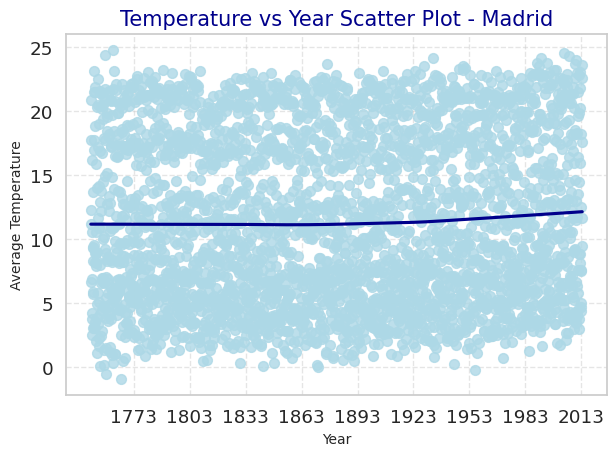

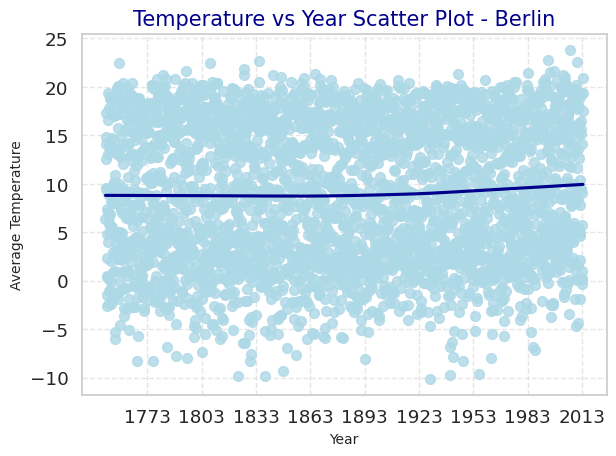

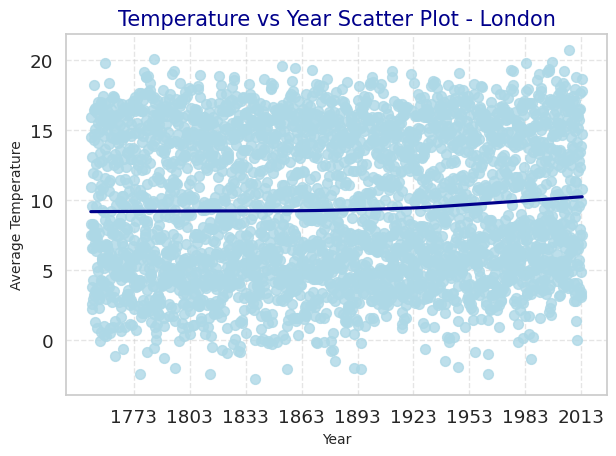

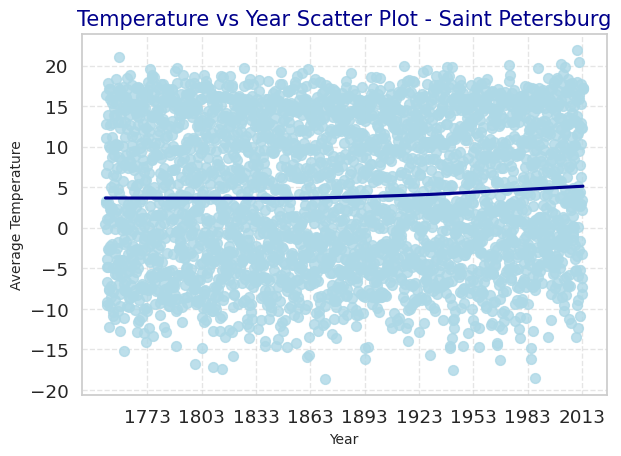

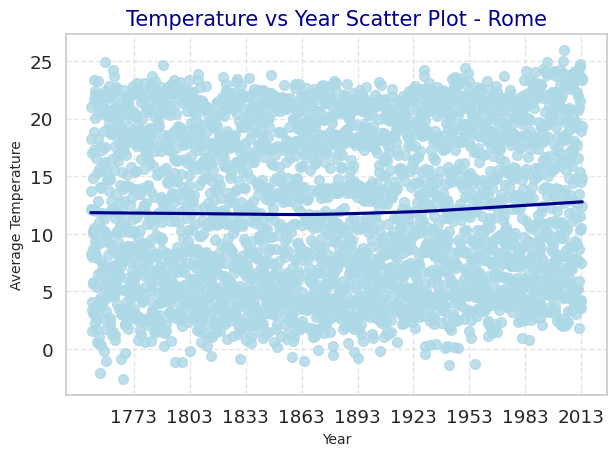

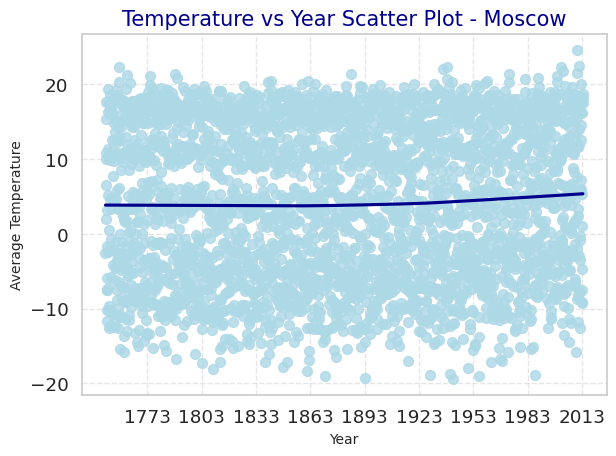

In [97]:
sns.set_palette("viridis")
sns.set(style="whitegrid", font_scale=1.2)

for c in Cities:
    city_df = df[df['City'] == c]
    city_df = city_df.reset_index(drop=True)
    city_df.dt = pd.to_datetime(city_df.dt)
    
    change_year_index = []
    change_year = []
    
    
    for y in range(0, len(city_df['Year']) - 1):
        if city_df['Year'].iloc[y] != city_df['Year'].iloc[y + 1]:
            change_year.append(city_df['Year'].iloc[y + 1])
            change_year_index.append(y + 1)

    x_ticks_year_list = np.linspace(min(city_df['Year']), max(city_df['Year']), 10).astype(int)
    change_year_index = np.array(change_year_index)
    
    
    x_ticks_year_index = [
        change_year_index[np.where(np.array(change_year) == year)[0][0]] for year in x_ticks_year_list[1:]
    ]
    
    
    sns.regplot(x=city_df.index, y=city_df['AverageTemperature'], scatter_kws={'s': 50, 'color': 'lightblue'},
                lowess=True, line_kws={'color': 'darkblue'})
    
    
    plt.xticks(ticks=x_ticks_year_index, labels=x_ticks_year_list[1:])
    
    
    plt.title(f'Temperature vs Year Scatter Plot - {c}', color='darkblue', fontsize=15)
    plt.xlabel('Year', fontsize=10)
    plt.ylabel('Average Temperature', fontsize=10)
    
   
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    
    
    plt.show()


**We have a multivalued problem where we need to pass city and country to model as well hence we can't use ARIMA**

**we will try Xgboost, catboost etc.still let's see Is our data stationary.**

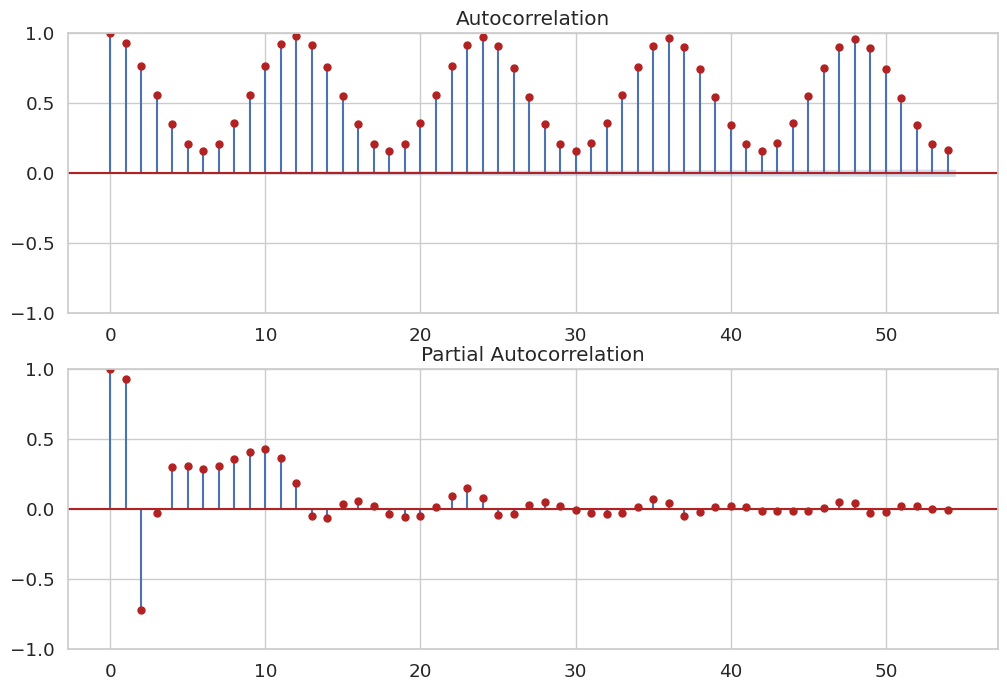

In [101]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.AverageTemperature, ax=ax1,color ='firebrick')
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.AverageTemperature, ax=ax2,color='firebrick')

## This suggests that our data is stationary, Let's check this using adfuller 

In [103]:
def adf_test(time_series):
    result = adfuller(time_series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])


time_series_data = df['AverageTemperature']


adf_test(time_series_data)

ADF Statistic: -6.346503375497201
p-value: 2.6748482714815393e-08
Critical Values: {'1%': -3.4303786700202767, '5%': -2.8615526717782096, '10%': -2.5667767447304595}


**p-value is less than a significance level (commonly 0.05), you can reject the null hypothesis of non-stationarity. Lower p-values indicate stronger evidence against the null hypothesis.**


In [106]:
city_one=df[df['City']=='Chicago']

In [107]:
city_one.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month,Day,Weekday,Year
49197,1743-11-01,5.436,2.205,Chicago,United States,42.59N,87.27W,11,1,4,1743
49198,1744-04-01,8.766,2.357,Chicago,United States,42.59N,87.27W,4,1,2,1744
49199,1744-05-01,11.605,2.102,Chicago,United States,42.59N,87.27W,5,1,4,1744
49200,1744-06-01,17.965,1.989,Chicago,United States,42.59N,87.27W,6,1,0,1744
49201,1744-07-01,21.680,1.786,Chicago,United States,42.59N,87.27W,7,1,2,1744


In [108]:
city_one['Latitude'].value_counts()

Latitude
42.59N    3141
Name: count, dtype: int64

In [109]:
city_one['Longitude'].value_counts()

Longitude
87.27W    3141
Name: count, dtype: int64

# **As we will be using City and Country as a label hence we will drop Longitude and Latitude columns**

In [110]:
df=df.drop(['Latitude','Longitude'],axis=1)

In [111]:
#lets save the cleaned data
df.to_csv('cleaned_temp_data.csv',index=False)